In [181]:
import numpy as np
import pandas as pd
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import signal

import scipy.optimize as opt

def get_median_filtered(signal, threshold=3):
    signal = signal.copy()
    difference = np.abs(signal - np.median(signal))
    median_difference = np.median(difference)
    if median_difference == 0:
        s = 0
    else:
        s = difference / float(median_difference)
    mask = s > threshold
    signal[mask] = np.median(signal)
    return signal
def throughoutOutliers(data):
    count =0
    return data


In [207]:
current=.9867e-6

trail1 =np.loadtxt("norm/1011_RXC.txt",) ## not good carbon data
#trail1[0]=throughoutOutliers(trail1[0])
#trail1[1]=throughoutOutliers(trail1[1])
#trail1[2]=throughoutOutliers(trail1[2])
#trail1[3]=throughoutOutliers(trail1[3])
trail2 =np.loadtxt("norm/1013_RXC.txt",)
trail2[0]=throughoutOutliers(trail2[0])
trail2[1]=throughoutOutliers(trail2[1])
trail2[2]=throughoutOutliers(trail2[2])
trail2[3]=throughoutOutliers(trail2[3])
trail2[0]=savgol_filter(trail2[0], 25, 3)
trail2[1]=savgol_filter(trail2[1], 25, 3)
trail2[2]=savgol_filter(trail2[2], 25, 3)
trail2[3]=savgol_filter(trail2[3], 25, 3)

trail3 =np.loadtxt("norm/1013_RXCa.txt",)
trail3[0]=throughoutOutliers(trail3[0])
trail3[1]=throughoutOutliers(trail3[1])
trail3[2]=throughoutOutliers(trail3[2])
trail3[3]=throughoutOutliers(trail3[3])
trail3[0]=savgol_filter(trail3[0], 25, 3)
trail3[1]=savgol_filter(trail3[1], 25, 3)
trail3[2]=savgol_filter(trail3[2], 25, 3)
trail3[3]=savgol_filter(trail3[3], 25, 3)



trail4 =np.loadtxt("norm/1016_RXC.txt",)
trail4[0]=get_median_filtered(trail4[0])
trail4[1]=throughoutOutliers(trail4[1])
trail4[2]=throughoutOutliers(trail4[2])
trail4[3]=throughoutOutliers(trail4[3])
#trail4[0]=savgol_filter(trail4[0], 85, 3)
#trail4[1]=savgol_filter(trail4[1], 40, 1)
#trail4[2]=savgol_filter(trail4[2], 25, 1)
#trail4[3]=savgol_filter(trail4[3], 25, 3)




trail5 =np.loadtxt("norm/1016_RXCb.txt",)
trail5[0]=throughoutOutliers(trail5[0])
trail5[1]=throughoutOutliers(trail5[1])
trail5[2]=throughoutOutliers(trail5[2])
trail5[3]=throughoutOutliers(trail5[3])
trail5[0]=savgol_filter(trail5[0], 25, 3)
trail5[1]=savgol_filter(trail5[1], 25, 3)
trail5[2]=savgol_filter(trail5[2], 25, 3)
trail5[3]=savgol_filter(trail5[3], 25, 3)


trails1 =np.loadtxt("norm/1017_RXC_super1.txt",)
trails2 =np.loadtxt("norm/1017_RXC_super2.txt",)
trails3 =np.loadtxt("norm/1017_RXC_super3.txt",)
throughout=100
dunktrail=[None,trail1[::,throughout::],trail2[::,throughout::],trail3[::,throughout::],trail4[::,throughout::],trail5[::,throughout::]]

In [206]:
len(dunktrail[4][0]), len(xrange)

(4990, 4980)

In [208]:
tempconversion=np.flip(pd.read_csv("Si_Diode_Specs_New.csv", header=None).to_numpy().T,axis=1)


In [209]:
tempconspline= inter.InterpolatedUnivariateSpline(tempconversion[1],tempconversion[0])


In [210]:
trail= 4
xrange=np.arange(0,len(dunktrail[trail][0])*.4,.4)
#dunktrail[trail][0]=tempconspline(dunktrail[trail][0])
firstspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][0],k=3)
secondspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][1])
thirdspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][2])
fourthspline= inter.InterpolatedUnivariateSpline(xrange,dunktrail[trail][3])
splines=[firstspline,secondspline,thirdspline,fourthspline]

Text(0.5, 1.0, 'material c')

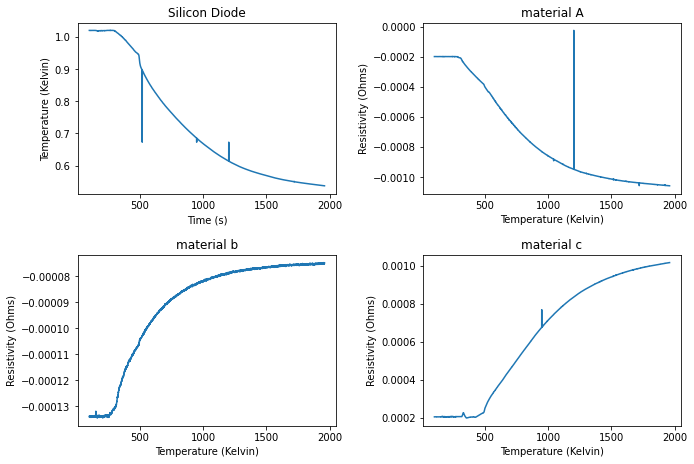

In [211]:
xfinerange=np.arange(throughout,len(dunktrail[trail][0])*.4,.4)

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=1.5)
fig.subplots_adjust(bottom=0.1, right=1.5, top=1.5)
ax[0][0].plot(xfinerange,splines[0](xfinerange))
ax[0][0].set_ylabel("Temperature (Kelvin)")
ax[0][0].set_xlabel("Time (s)")
ax[0][0].set_title("Silicon Diode")
ax[0][1].plot(xfinerange,splines[1](xfinerange))
ax[0][1].set_ylabel("Resistivity (Ohms)")
ax[0][1].set_xlabel("Temperature (Kelvin)")
ax[0][1].set_title("material A")
ax[1][0].plot(xfinerange,splines[2](xfinerange))
ax[1][0].set_ylabel("Resistivity (Ohms)")
ax[1][0].set_xlabel("Temperature (Kelvin)")
ax[1][0].set_title("material b")
ax[1][1].plot(xfinerange,splines[3](xfinerange))
ax[1][1].set_ylabel("Resistivity (Ohms)")
ax[1][1].set_xlabel("Temperature (Kelvin)")
ax[1][1].set_title("material c")

In [ ]:


fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=3)
ax[0][0].plot(xfinerange,splines[0](xfinerange,nu=1))
ax[0][0].set_ylabel("Temperature (Kelvin)")
ax[0][1].plot(splines[0](xfinerange),splines[1](xfinerange,nu=1),'.')
ax[0][1].set_ylabel("Change in Resistivity (Ohms)")
ax[1][0].plot(splines[0](xfinerange),splines[2](xfinerange,nu=1),'.')
ax[1][0].set_ylabel("Change in Resistivity (Ohms)")
ax[1][1].plot(splines[0](xfinerange),splines[3](xfinerange,nu=1),'.')
ax[1][1].set_ylabel("Change in Resistivity (Ohms)")

In [ ]:
plt.plot(xfinerange,splines[2](xfinerange,nu=2))

In [ ]:
len(trail4[1])

In [ ]:

trail4 =np.loadtxt("norm/1016_RXC.txt",)

In [ ]:
xaxis=np.arange( 0,len(trail4[0])*.4,.4)
plt.plot(xaxis[100::],throughoutOutliers(trail4[0][100::]))

In [ ]:
len(trail4[0])*.4

In [ ]:
throughoutOutliers(trail4[0][100:150])

In [ ]:
trail4[0][100:150]